2794.0443043337914


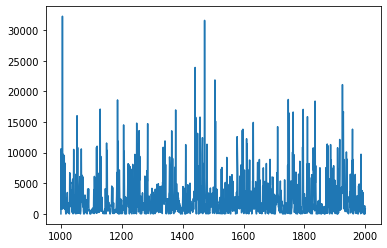

In [65]:
from h5py import File
import dask.array as da
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

from numpy import linspace, pi, sum, cos, abs,array,exp,sin

with File('../data/WECSim_dataset_RM3_scale_0-1873.hdf5','r') as f:
    time = da.from_array(f['Hs_1.75/Tp_8.5/Time'])
    power = da.from_array(f['Hs_1.75/Tp_8.5/Power'])
    time, power = time.persist(), power.persist()
    
with File('tempFFTFile.h5','r') as f:
    a = f['Hs_1.75/Tp_8.5']
    A,freq,p,mean = a['Amplitude'][:],a['frequency'][:],a['phase'][:],a['fftmean'][()]
    
#print(A,freq,p,mean)

power, time = power.compute(), time.compute()
FFT = fft(power)
F = fftfreq(len(time),d=time[1]-time[0])
    
def Sum(t):
    return sum(A*cos(2*pi*freq*t+p))+mean
def expo(t):
     return sum(FFT.real*cos(2*pi*F*t)+FFT.imag*sin(2*pi*F*t))

z = []
out = linspace(1000,2000,1001)
for t in out:
    a = (2/len(FFT))*expo(t)
    z.append(a)

plt.plot(out,z)
print(array(z).mean())

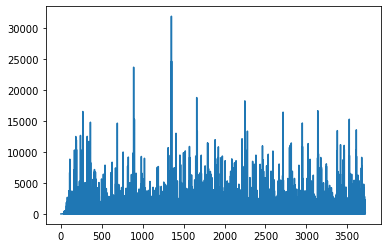

In [46]:
plt.plot(time,power)

In [3]:
from numpy import arctan2
from scipy.fft import fft,rfft,fftfreq

ysamples = time.shape[0]
Mean = power.mean()
y = fft((power-Mean).compute())
yspacing = (time[1]-time[0]).compute()
yfreq = fftfreq(ysamples,yspacing)
y = y[1:ysamples//2]
A,p, freq = (2/ysamples)*abs(y), arctan2(y.imag,y.real), yfreq[1:ysamples//2]

distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available


In [6]:
from numpy import linspace, pi, sum, cos

def Sum(t):
    return sum(A*cos(2*pi*freq*t+p))+Mean.compute()

z = []
out = linspace(0,1000,1001)
for t in out:
    a = Sum(t)
    print(a)
    z.append(a)

0.10115900130585942
0.10176698693339858
0.10119769644006738
0.11814878337645496
0.22624304026157915
0.1013071563147605
0.9935827861263533
0.7677565903750292
0.12482463980722969
2.0071680471564832
3.6885987914110956
0.5142650562956987
2.0072317142785323
1.5616839551794328
3.236626288966363
10.290350516598664
4.48613466194638
7.980857715848288
4.3486445074540825
0.5182659274269099
9.919113169801676
18.729992789798416
2.039380025542414
34.87207831588239
65.12404354751743
0.12615558299785334
278.67577177504154
35.373582186874046
134.56241552365555
177.3669680110288
65.3443191865972
280.3325058780456
145.39217163252306
1.4865485716072726
179.57737362299667
75.32026480509558
832.3698624289427
338.34223534290595
385.2040757509785
497.49569904925374
23.885879293834478
371.8353395478871
134.30084862417607
19.632492968541555
24.57506229597766
42.255605002756056
0.7947595796040332
17.481082984748355
137.46202378535327
6.094050814605907
165.05697710577078
0.11769768151771132
1253.357985918652
287.

distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available
distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available
distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available
distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available
distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available
distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker


KeyboardInterrupt: 

distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available
distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available
distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available
distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available
distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available
distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available


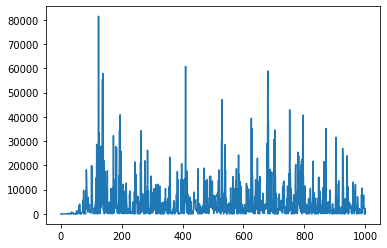

In [5]:
plt.plot(out,z)

In [10]:
total.result()

501501.0